<a href="https://colab.research.google.com/github/Patotricks15/Brawlhalla_recomendador/blob/main/Cluster_brawlhalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização e análise de dados dos personagens Brawlhalla



## Leitura e limpeza dos dados


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/brawlhallastats.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   legend     53 non-null     object
 1   strength   53 non-null     int64 
 2   dexterity  53 non-null     int64 
 3   defense    53 non-null     int64 
 4   speed      53 non-null     int64 
 5   Weapon_1   53 non-null     object
 6   Weapon_2   53 non-null     object
dtypes: int64(4), object(3)
memory usage: 3.0+ KB


In [ ]:
X = df.drop(columns=['legend','Weapon_1','Weapon_2'])
#X_teste = df.drop(columns=['legend','Weapon_1','Weapon_2']).iloc[35:]

## Selecionando a quantidade de clusters

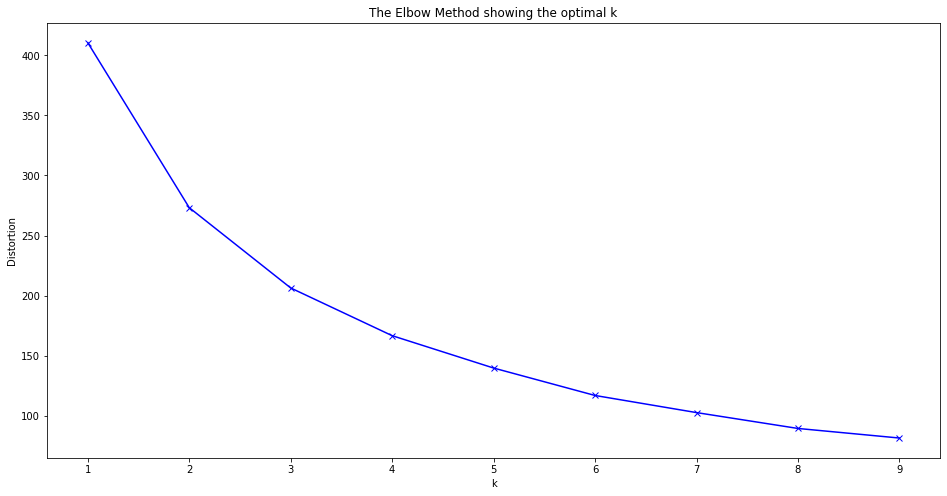

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Modelando os clusters

In [ ]:
k_means = KMeans(n_clusters=4, random_state=0)
k_means.fit(X)
predict = k_means.predict(X)

In [ ]:
X['cluster'] = predict

In [ ]:
X['cluster'] = X['cluster'].apply(lambda x : str(x))

In [ ]:
df_cluster0 = X[X['cluster']=='0']
df_cluster1 = X[X['cluster']=='1']
df_cluster2 = X[X['cluster']=='2']
df_cluster3 = X[X['cluster']=='3']


Por último, vamos salvar cada cluster em um dataframe diferente



In [ ]:
df_cluster0 = df_cluster0.join(df['legend'], how='outer').dropna()

In [ ]:
df_cluster1 = df_cluster1.join(df['legend'], how='outer').dropna()

In [ ]:
df_cluster2 = df_cluster2.join(df['legend'], how='outer').dropna()

In [ ]:
df_cluster3 = df_cluster3.join(df['legend'], how='outer').dropna()

In [ ]:
df_cluster_geral = df_cluster0.append(df_cluster1).append(df_cluster2).append(df_cluster3)

In [ ]:
df_cluster_geral.to_excel('clust_brawl.xlsx')

## Análise de dados dos clusters
---
Para essa análise, será importante a compreensão do conceito de visão.

As visões representam as diferentes maneiras de enxergar o mesmo conjunto de dados. Isso é importante pois dependendo da visão que estivermos olhando, podemos tomar diferentes decisões de negócios.

In [ ]:
c0 = pd.DataFrame(df_cluster0.describe().T['50%']).rename(columns={'50%':'cluster0'}).T
c1 = pd.DataFrame(df_cluster1.describe().T['50%']).rename(columns={'50%':'cluster1'}).T
c2 = pd.DataFrame(df_cluster2.describe().T['50%']).rename(columns={'50%':'cluster2'}).T
c3 = pd.DataFrame(df_cluster3.describe().T['50%']).rename(columns={'50%':'cluster3'}).T

df_median = c0.append(c1).append(c2).append(c3)
df_median['sum'] = df_median['defense']+df_median['dexterity']+df_median['speed']+df_median['strength']
df_median

,strength,dexterity,defense,speed,sum
cluster0,6.0,4.0,7.0,4.0,21.0
cluster1,6.0,5.0,4.0,7.0,22.0
cluster2,5.0,7.0,4.0,5.0,21.0
cluster3,4.0,5.0,6.0,6.5,21.5


### Visão atributos

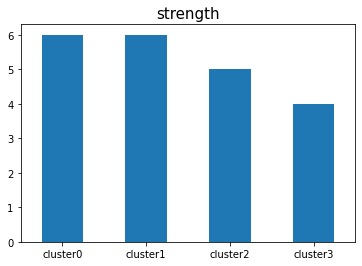

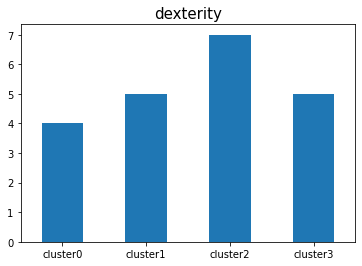

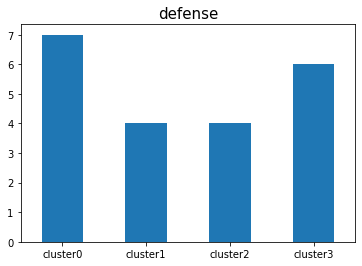

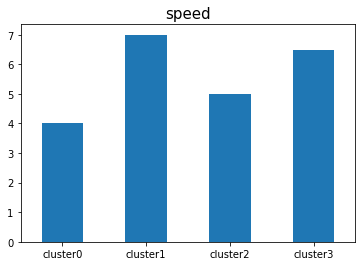

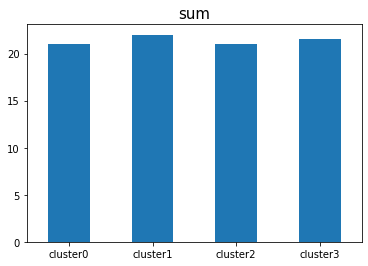

In [ ]:
for i in df_median.columns:
  df_median[i].plot(kind='bar')
  plt.xticks(rotation=360)
  plt.title(i, fontsize=15)
  plt.show()

### Visão cluster

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

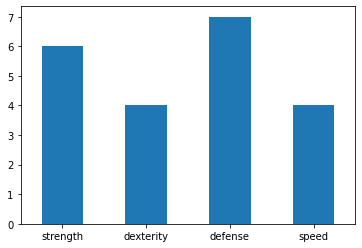

In [ ]:
df_describe0 = df_cluster0.describe().T
df_describe0['50%'].plot(kind='bar')
plt.xticks(rotation=360)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

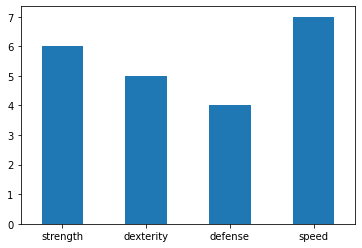

In [ ]:
df_describe1 = df_cluster1.describe().T
df_describe1['50%'].plot(kind='bar')
plt.xticks(rotation=360)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

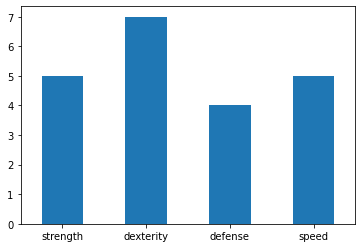

In [ ]:
df_describe2 = df_cluster2.describe().T
df_describe2['50%'].plot(kind='bar')
plt.xticks(rotation=360)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

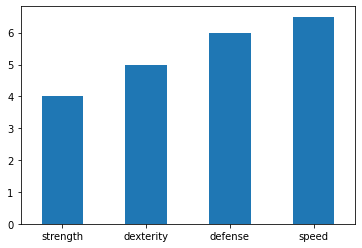

In [ ]:
df_describe3 = df_cluster3.describe().T
df_describe3['50%'].plot(kind='bar')
plt.xticks(rotation=360)

## Plotting clusters
---
Agora vamos observar os clusters de outra maneira. Vamos analisar a distribuição em cada atributo, assim podemos ver como cada atributo se encaixa em cada cluster

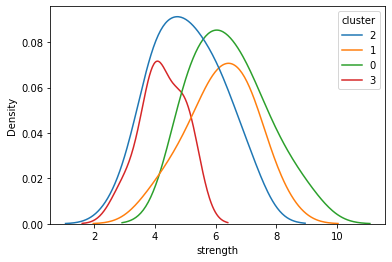

In [ ]:
sns.kdeplot(data=X, x='strength', hue='cluster')

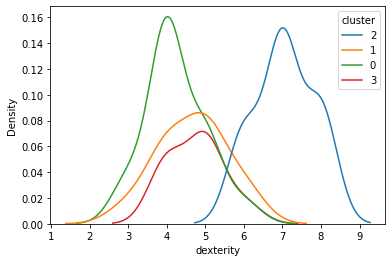

In [ ]:
sns.kdeplot(data=X, x='dexterity', hue='cluster')

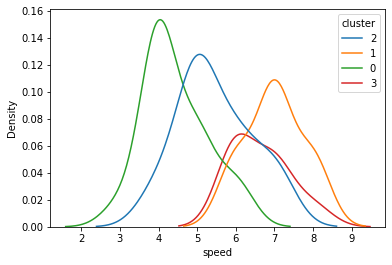

In [ ]:
sns.kdeplot(data=X, x='speed', hue='cluster')

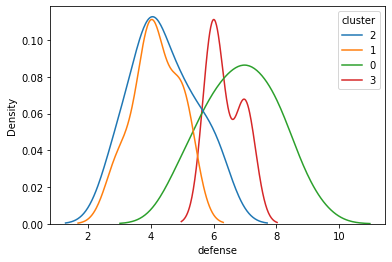

In [ ]:
sns.kdeplot(data=X, x='defense', hue='cluster')

Conseguimos observar que na força, os clusters se musturam bastante, e que na destreza já conseguimos fazer um corte mais preciso, com exceção da similaridade entre os clusters 1 e 3